In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
plt.style.use('ggplot')
%matplotlib inline

In [2]:
ds = xr.open_dataset('pr_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc')
print(ds)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 145, lon: 192, time: 1872)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes:
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    institute_id:           CSIRO-BOM
    experiment_id:          historical
    source:                 ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-p...
    model_id:               ACCESS1.3
    forcing:                GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2, N2O, CH4...
    parent_experiment_id:   piControl
    parent_experiment_rip:  r1i1p1
    bran

In [3]:
pr = ds['pr']
print(pr)

<xarray.DataArray 'pr' (time: 1872, lat: 145, lon: 192)>
[52116480 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    comment:           at surface; includes both liquid and solid phases from...
    units:             kg m-2 s-1
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-02-08T06:45:54Z altered by CMOR: replaced missing...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...


In [4]:
pr = pr*30*24*3600
print(pr)

<xarray.DataArray 'pr' (time: 1872, lat: 145, lon: 192)>
array([[[ 3.8473165,  3.8473165,  3.8473165, ...,  3.8458867,
          3.8458867,  3.8458867],
        [ 5.0143337,  4.978721 ,  4.9045463, ...,  4.845348 ,
          4.918953 ,  4.920969 ],
        [ 6.4365463,  6.558586 ,  6.7558417, ...,  5.8930087,
          6.087036 ,  6.258879 ],
        ...,
        [18.407701 , 18.268885 , 18.475498 , ..., 18.173853 ,
         18.220766 , 18.218462 ],
        [15.640373 , 15.664583 , 15.606068 , ..., 15.429414 ,
         15.537934 , 15.57199  ],
        [13.646786 , 13.646786 , 13.646786 , ..., 13.646786 ,
         13.646786 , 13.646786 ]],

       [[ 6.08236  ,  6.08236  ,  6.08236  , ...,  6.0818596,
          6.0818596,  6.0818596],
        [ 4.8372836,  4.750389 ,  4.675138 , ...,  5.1227307,
          5.0095663,  4.9198594],
        [ 3.9268148,  3.7571616,  3.603007 , ...,  4.463119 ,
          4.2817383,  4.0922966],
        ...,
        [14.51319  , 13.876928 , 13.283113 , ..., 1

In [5]:
pr_bm = pr.sel(lat=slice(-20,20),lon=slice(90,160))
print(pr_bm)

<xarray.DataArray 'pr' (time: 1872, lat: 33, lon: 38)>
array([[[3.27974167e+01, 2.69479198e+01, 2.16606979e+01, ...,
         5.30489693e+01, 5.80844765e+01, 5.05003815e+01],
        [3.24819489e+01, 2.55849743e+01, 1.82543621e+01, ...,
         9.48242722e+01, 6.59841385e+01, 5.27378159e+01],
        [2.01826267e+01, 1.87158451e+01, 1.94405346e+01, ...,
         7.91689377e+01, 7.33096695e+01, 5.76325264e+01],
        ...,
        [1.83752136e+01, 2.84630451e+01, 3.01624470e+01, ...,
         3.92409935e+01, 3.07302723e+01, 3.00869560e+01],
        [1.69064522e+01, 1.62390957e+01, 1.06508560e+01, ...,
         7.68419418e+01, 5.44062767e+01, 4.40820084e+01],
        [1.65910015e+01, 1.61794701e+01, 1.26976004e+01, ...,
         6.68837891e+01, 6.08938980e+01, 6.21407623e+01]],

       [[3.01312790e+01, 2.43283386e+01, 1.72953167e+01, ...,
         4.98849564e+01, 5.27583542e+01, 3.98192291e+01],
        [2.43714790e+01, 2.34348164e+01, 2.56363354e+01, ...,
         4.42819176e+01, 4.9

In [6]:
pr_bm_klim = pr_bm.sel(time=slice('1961-01','1990-12')).mean(dim='time')
pr_bm_anom = pr_bm - pr_bm_klim
print(pr_bm_anom)

<xarray.DataArray 'pr' (time: 1872, lat: 33, lon: 38)>
array([[[-1.73834953e+01, -2.14144077e+01, -2.33424072e+01, ...,
         -1.73410301e+01, -1.25614357e+01, -2.29233398e+01],
        [-1.77332382e+01, -2.06675816e+01, -2.57532520e+01, ...,
          2.51187210e+01, -8.68259430e+00, -2.66072693e+01],
        [-3.21942215e+01, -3.10858974e+01, -2.77748241e+01, ...,
         -3.86166382e+00, -1.62471771e+01, -4.06904869e+01],
        ...,
        [-4.02784424e+01, -6.12844086e+01, -1.62591980e+02, ...,
         -6.01180153e+01, -6.46292572e+01, -5.79654808e+01],
        [-4.72705727e+01, -8.89400024e+01, -1.94145203e+02, ...,
         -3.57862167e+01, -5.53561821e+01, -6.02122269e+01],
        [-5.30827866e+01, -1.11547958e+02, -1.48172409e+02, ...,
         -5.29510117e+01, -5.72850418e+01, -4.98731461e+01]],

       [[-2.00496330e+01, -2.40339890e+01, -2.77077885e+01, ...,
         -2.05050430e+01, -1.78875580e+01, -3.36044922e+01],
        [-2.58437080e+01, -2.28177395e+01, -1.83

In [7]:
pr_bm_anom_mod = pr_bm_anom.sel(time=slice('1990-01', None))
print(pr_bm_anom_mod)

<xarray.DataArray 'pr' (time: 192, lat: 33, lon: 38)>
array([[[-2.27746964e+00, -5.07651520e+00, -9.53042984e+00, ...,
          1.00355453e+01, -1.26150742e+01, -1.24108276e+01],
        [-5.14791489e+00, -9.83188248e+00, -1.24514580e+01, ...,
          5.07278442e-01, -1.21720276e+01, -2.70385399e+01],
        [-2.17557793e+01, -1.83759556e+01, -1.92426949e+01, ...,
         -1.97712097e+01, -3.36671486e+01, -5.92156830e+01],
        ...,
        [-5.25311928e+01, -8.50106583e+01, -1.87248856e+02, ...,
         -7.51053162e+01, -7.18142242e+01, -6.37747192e+01],
        [-6.00380402e+01, -9.74966202e+01, -2.02614151e+02, ...,
         -9.31697998e+01, -8.83458862e+01, -8.27178116e+01],
        [-6.49809952e+01, -1.23335602e+02, -1.59777435e+02, ...,
         -7.19981689e+01, -7.04503937e+01, -6.99194946e+01]],

       [[-1.82161121e+01, -1.74797649e+01, -2.19253082e+01, ...,
          2.15948196e+02,  2.78179565e+02,  2.13899734e+02],
        [-1.45098953e+01, -1.71147881e+01, -2.179

<Figure size 2880x2160 with 0 Axes>

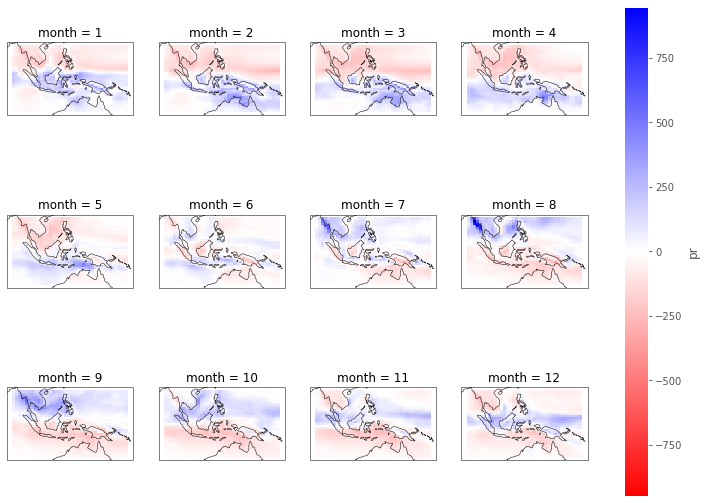

In [12]:
plt.figure(figsize=(40,30));
proj = ccrs.PlateCarree();
pr_anom_bul = pr_bm_anom_mod.groupby('time.month').mean(dim='time')
p = pr_anom_bul.plot(col='month',col_wrap=4,
                subplot_kws=dict(projection=proj),
                transform=ccrs.PlateCarree(),
                cmap = 'bwr_r');

for ax in p.axes.flat:
    ax.coastlines();
plt.savefig('gambar21.png')